In [42]:
import sys
sys.path.append('../utils')

import helpers as h
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmasher as cmr

plt.style.use('default')
plt.rcParams.update({'font.size': 12})
%matplotlib inline

In [3]:
data = h.load_data(indexed=False)
all_stations = h.load_stations(data)

cleaned_data = h.clean_data(data, max_missing=121, max_alt=1000.0)
cleaned_stations = h.load_stations(cleaned_data)

In [4]:
removed_stations = all_stations[~all_stations['station'].isin(cleaned_stations['station'])].copy()

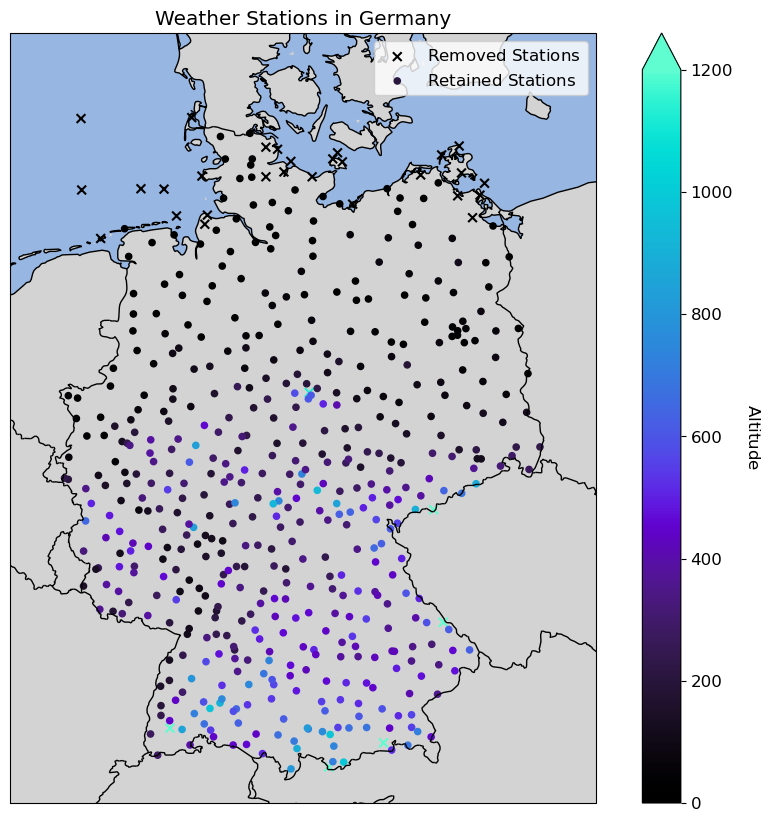

In [60]:
ax = h.plot_map()

cmap_nodes = cmr.cosmic
norm = plt.Normalize(vmin=min(all_stations.alt), vmax=1200)

colors_1 = [cmap_nodes(norm(value)) for value in removed_stations.alt]
scatter1 = plt.scatter(removed_stations['lon'], removed_stations['lat'], marker='x', label=r'$\mathrm{Removed\ Stations}$', c=colors_1, s=40)

# Plotting cleaned stations with a different marker
colors_2 = [cmap_nodes(norm(value)) for value in cleaned_stations.alt]
scatter2 = plt.scatter(cleaned_stations['lon'], cleaned_stations['lat'], marker='o', label=r'$\mathrm{Retained\ Stations}$', c=colors_2, s=20)

# colorbar
sm_nodes = plt.cm.ScalarMappable(cmap=cmap_nodes, norm=norm)
colbar = plt.colorbar(sm_nodes, ax=ax, extend='max')
colbar.ax.set_ylabel(r'$\mathrm{Altitude}$', rotation=270, labelpad=20)

plt.title("Weather Stations in Germany")

plt.legend()

## Fix the aspect ratio of the map
lat_center = (ax.get_extent()[2] + ax.get_extent()[3]) / 2
ax.set_aspect(1 / np.cos(np.radians(lat_center)))

plt.savefig("plots/stations_cleaned.pdf", format="pdf", dpi=600, bbox_inches='tight')